In [2]:
#Loading Data

#install.packages("openxlsx")
library(openxlsx)

#install.packages ('dplyr')
library(dplyr)

ncaa_data <- read.xlsx("/content/NCAA Dynasty FINAL.xlsx", sheet = 'FINAL')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#Previewing Data
head(ncaa_data)

,Team,Name,Skill.Points,Position,Year,DevT,DevT.Num,Snaps,HC_Moti.1,HC_Moti.2,⋯,HC_TD1,HC_TD2,HC_TD3,OC_TD1,OC_TD2,OC_TD3,DC_TD1,DC_TD2,DC_TD3,XP.Penalty
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Auburn,J Stromberg,89,RB,JR,Elite,4,457,1,0,⋯,1,0,0,0,0,0,1,0,1,0
2,Auburn,S Anthrop,89,RB,SO,Elite,4,192,1,0,⋯,1,1,0,0,0,0,1,1,0,0
3,Auburn,J Tatum,134,CB,FR (RS),Elite,4,1089,0,0,⋯,1,1,1,0,0,0,1,1,1,0
4,Auburn,D Starks,135,CB,FR (RS),Elite,4,1083,0,0,⋯,1,1,1,0,0,0,1,1,1,0
5,Auburn,M Holliday,167,CB,FR,Elite,4,314,0,0,⋯,1,1,1,0,0,0,1,1,1,0
6,Auburn,D Snow,45,QB,JR (RS),Impact,2,1,1,0,⋯,1,0,0,0,0,0,1,0,0,0


In [4]:
#Previewing Data
str(ncaa_data)

'data.frame':	528 obs. of  22 variables:
 $ Team        : chr  "Auburn" "Auburn" "Auburn" "Auburn" ...
 $ Name        : chr  "J Stromberg" "S Anthrop" "J Tatum" "D Starks" ...
 $ Skill.Points: num  89 89 134 135 167 45 64 74 88 84 ...
 $ Position    : chr  "RB" "RB" "CB" "CB" ...
 $ Year        : chr  "JR" "SO" "FR (RS)" "FR (RS)" ...
 $ DevT        : chr  "Elite" "Elite" "Elite" "Elite" ...
 $ DevT.Num    : num  4 4 4 4 4 2 2 2 2 2 ...
 $ Snaps       : num  457 192 1089 1083 314 ...
 $ HC_Moti.1   : num  1 1 0 0 0 1 1 1 1 1 ...
 $ HC_Moti.2   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OC_Moti.1   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DC_Moti.1   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ HC_TD1      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ HC_TD2      : num  0 1 1 1 1 0 1 1 1 0 ...
 $ HC_TD3      : num  0 0 1 1 1 0 0 0 0 0 ...
 $ OC_TD1      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OC_TD2      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OC_TD3      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DC_TD1      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ DC

In [5]:
#Previewing Data
summary(ncaa_data)

     Team               Name            Skill.Points      Position        
 Length:528         Length:528         Min.   :  1.00   Length:528        
 Class :character   Class :character   1st Qu.: 19.00   Class :character  
 Mode  :character   Mode  :character   Median : 31.00   Mode  :character  
                                       Mean   : 35.76                     
                                       3rd Qu.: 47.00                     
                                       Max.   :167.00                     
     Year               DevT              DevT.Num         Snaps       
 Length:528         Length:528         Min.   :1.000   Min.   :   0.0  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:   0.0  
 Mode  :character   Mode  :character   Median :2.000   Median :   1.5  
                                       Mean   :2.085   Mean   : 221.4  
                                       3rd Qu.:3.000   3rd Qu.: 298.2  
                                       Max.

In [6]:
# See all unique values in Position
cat("Unique Position values:\n")
unique(ncaa_data$Position)

# See all unique values in Year
cat("\nUnique Year values:\n")
unique(ncaa_data$Year)

# Or use table() to see counts of each
cat("\nPosition counts:\n")
table(ncaa_data$Position)

cat("\nYear counts:\n")
table(ncaa_data$Year)

Unique Position values:


[1] "RB"  "CB"  "QB"  "TE"  "WR"  "OL"  "S"   "DL"  "LB"  "CB " "S "  " DL"
[13] "DL " "WR " "K"   "P"   "TE "


Unique Year values:


[1] "JR"      "SO"      "FR (RS)" "FR"      "JR (RS)" "SO (RS)" "FR "


Position counts:



 DL  CB CB   DL DL    K  LB  OL   P  QB  RB   S  S   TE TE   WR WR  
  1  45   1  83   3   5  65 114   6  28  45  48   2  29   1  51   1 


Year counts:



     FR     FR  FR (RS)      JR JR (RS)      SO SO (RS) 
    103       2     140      64      74      58      87 

In [7]:
#Cleaning Columns
ncaa_data$Position <- trimws(ncaa_data$Position)
ncaa_data$Year <- trimws(ncaa_data$Year)

In [8]:
#Creating Dummy Variables

#install.packages("fastDummies")
library(fastDummies)

ncaa_dummy <- fastDummies::dummy_cols(
  ncaa_data,
  select_columns = c("Position", "Year"),
  remove_first_dummy = FALSE,
  remove_selected_columns = FALSE
)

#Remove QB to make it baseline
ncaa_dummy$Position_QB <- NULL

# Remove FR to make it baseline
ncaa_dummy$Year_FR <- NULL

# Verify
cat("Final columns:", ncol(ncaa_dummy), "\n")

# Cleaning data, removing extra space
colnames(ncaa_dummy) <- trimws(colnames(ncaa_dummy))

colnames(ncaa_dummy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Final columns: 37 


[1] "Team"         "Name"         "Skill.Points" "Position"     "Year"        
 [6] "DevT"         "DevT.Num"     "Snaps"        "HC_Moti.1"    "HC_Moti.2"   
[11] "OC_Moti.1"    "DC_Moti.1"    "HC_TD1"       "HC_TD2"       "HC_TD3"      
[16] "OC_TD1"       "OC_TD2"       "OC_TD3"       "DC_TD1"       "DC_TD2"      
[21] "DC_TD3"       "XP.Penalty"   "Position_CB"  "Position_DL"  "Position_K"  
[26] "Position_LB"  "Position_OL"  "Position_P"   "Position_RB"  "Position_S"  
[31] "Position_TE"  "Position_WR"  "Year_FR (RS)" "Year_JR"      "Year_JR (RS)"
[36] "Year_SO"      "Year_SO (RS)"

In [9]:
#Previewing Dummy Data
head(ncaa_dummy)

,Team,Name,Skill.Points,Position,Year,DevT,DevT.Num,Snaps,HC_Moti.1,HC_Moti.2,⋯,Position_P,Position_RB,Position_S,Position_TE,Position_WR,Year_FR (RS),Year_JR,Year_JR (RS),Year_SO,Year_SO (RS)
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Auburn,J Stromberg,89,RB,JR,Elite,4,457,1,0,⋯,0,1,0,0,0,0,1,0,0,0
2,Auburn,S Anthrop,89,RB,SO,Elite,4,192,1,0,⋯,0,1,0,0,0,0,0,0,1,0
3,Auburn,J Tatum,134,CB,FR (RS),Elite,4,1089,0,0,⋯,0,0,0,0,0,1,0,0,0,0
4,Auburn,D Starks,135,CB,FR (RS),Elite,4,1083,0,0,⋯,0,0,0,0,0,1,0,0,0,0
5,Auburn,M Holliday,167,CB,FR,Elite,4,314,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,Auburn,D Snow,45,QB,JR (RS),Impact,2,1,1,0,⋯,0,0,0,0,0,0,0,1,0,0


In [10]:
#Previewing Dummy Data
str(ncaa_dummy)

'data.frame':	528 obs. of  37 variables:
 $ Team        : chr  "Auburn" "Auburn" "Auburn" "Auburn" ...
 $ Name        : chr  "J Stromberg" "S Anthrop" "J Tatum" "D Starks" ...
 $ Skill.Points: num  89 89 134 135 167 45 64 74 88 84 ...
 $ Position    : chr  "RB" "RB" "CB" "CB" ...
 $ Year        : chr  "JR" "SO" "FR (RS)" "FR (RS)" ...
 $ DevT        : chr  "Elite" "Elite" "Elite" "Elite" ...
 $ DevT.Num    : num  4 4 4 4 4 2 2 2 2 2 ...
 $ Snaps       : num  457 192 1089 1083 314 ...
 $ HC_Moti.1   : num  1 1 0 0 0 1 1 1 1 1 ...
 $ HC_Moti.2   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OC_Moti.1   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DC_Moti.1   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ HC_TD1      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ HC_TD2      : num  0 1 1 1 1 0 1 1 1 0 ...
 $ HC_TD3      : num  0 0 1 1 1 0 0 0 0 0 ...
 $ OC_TD1      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OC_TD2      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OC_TD3      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DC_TD1      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ DC

In [11]:
#Previewing Dummy Data
summary(ncaa_dummy)

     Team               Name            Skill.Points      Position        
 Length:528         Length:528         Min.   :  1.00   Length:528        
 Class :character   Class :character   1st Qu.: 19.00   Class :character  
 Mode  :character   Mode  :character   Median : 31.00   Mode  :character  
                                       Mean   : 35.76                     
                                       3rd Qu.: 47.00                     
                                       Max.   :167.00                     
     Year               DevT              DevT.Num         Snaps       
 Length:528         Length:528         Min.   :1.000   Min.   :   0.0  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:   0.0  
 Mode  :character   Mode  :character   Median :2.000   Median :   1.5  
                                       Mean   :2.085   Mean   : 221.4  
                                       3rd Qu.:3.000   3rd Qu.: 298.2  
                                       Max.

In [12]:
#Building models
Full_Model <- Full_Model <- lm(Skill.Points ~ DevT + Snaps +
                 HC_Moti.1 + HC_Moti.2 + OC_Moti.1 + DC_Moti.1 +
                 HC_TD1 + HC_TD2 + HC_TD3 +
                 OC_TD1 + OC_TD2 + OC_TD3 +
                 DC_TD1 + DC_TD2 + DC_TD3 +
                 XP.Penalty,
                 data = ncaa_data)


Dummy_Model <- lm(Skill.Points ~ DevT + HC_Moti.1 + HC_Moti.2 + OC_Moti.1 + DC_Moti.1 +
                 HC_TD1 + HC_TD2 + HC_TD3 + OC_TD1 + OC_TD2 + OC_TD3 +
                 DC_TD1 + DC_TD2 + DC_TD3 + XP.Penalty +
                 Position_CB + Position_DL + Position_K +
                 Position_LB + Position_OL + Position_P + Position_RB +
                 Position_S + Position_TE + Position_WR +
                 `Year_FR (RS)` + Year_JR + `Year_JR (RS)` + Year_SO +
                 `Year_SO (RS)`,
                 data = ncaa_dummy)


In [13]:
#Showing Full_model
summary(Full_Model)


Call:
lm(formula = Skill.Points ~ DevT + Snaps + HC_Moti.1 + HC_Moti.2 + 
    OC_Moti.1 + DC_Moti.1 + HC_TD1 + HC_TD2 + HC_TD3 + OC_TD1 + 
    OC_TD2 + OC_TD3 + DC_TD1 + DC_TD2 + DC_TD3 + XP.Penalty, 
    data = ncaa_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.342  -5.419  -0.106   3.863  55.556 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.820e+01  3.186e+00  24.548  < 2e-16 ***
DevTImpact  -3.709e+01  3.019e+00 -12.288  < 2e-16 ***
DevTNormal  -4.967e+01  3.124e+00 -15.897  < 2e-16 ***
DevTStar    -2.344e+01  3.013e+00  -7.781 4.05e-14 ***
Snaps        6.198e-04  1.461e-03   0.424 0.671679    
HC_Moti.1    1.076e-01  1.054e+00   0.102 0.918775    
HC_Moti.2    1.538e+00  1.233e+00   1.248 0.212627    
OC_Moti.1   -2.372e+00  1.691e+00  -1.403 0.161250    
DC_Moti.1    1.725e-01  1.319e+00   0.131 0.896013    
HC_TD1       1.320e+01  1.727e+00   7.643 1.06e-13 ***
HC_TD2       6.066e+00  1.729e+00   3.507 0.000493 ***
HC_TD3 

In [14]:
#Showing Dummy Model
summary(Dummy_Model)


Call:
lm(formula = Skill.Points ~ DevT + HC_Moti.1 + HC_Moti.2 + OC_Moti.1 + 
    DC_Moti.1 + HC_TD1 + HC_TD2 + HC_TD3 + OC_TD1 + OC_TD2 + 
    OC_TD3 + DC_TD1 + DC_TD2 + DC_TD3 + XP.Penalty + Position_CB + 
    Position_DL + Position_K + Position_LB + Position_OL + Position_P + 
    Position_RB + Position_S + Position_TE + Position_WR + `Year_FR (RS)` + 
    Year_JR + `Year_JR (RS)` + Year_SO + `Year_SO (RS)`, data = ncaa_dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.710  -4.313  -0.329   3.852  44.425 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     85.32342    3.42366  24.922  < 2e-16 ***
DevTImpact     -40.24230    2.60060 -15.474  < 2e-16 ***
DevTNormal     -52.43096    2.68852 -19.502  < 2e-16 ***
DevTStar       -25.41614    2.57829  -9.858  < 2e-16 ***
HC_Moti.1        1.35750    0.90753   1.496 0.135340    
HC_Moti.2        0.87903    1.05903   0.830 0.406921    
OC_Moti.1        1.15965    1.57256   0.737 0.461213    


In [15]:
# ===== GET PREDICTIONS AND RESIDUALS FIRST =====

# For Full Model
ncaa_data$Predicted_Full <- predict(Full_Model)
ncaa_data$Residual_Full <- ncaa_data$Skill.Points - ncaa_data$Predicted_Full

# For Dummy Model
ncaa_dummy$Predicted_Dummy <- predict(Dummy_Model)
ncaa_dummy$Residual_Dummy <- ncaa_dummy$Skill.Points - ncaa_dummy$Predicted_Dummy



In [16]:
# ===== IDENTIFY OUTLIERS USING IQR METHOD =====

# FULL MODEL OUTLIERS
cat("===== FULL MODEL OUTLIERS =====\n\n")

# Calculate IQR for Full Model residuals
Q1_full <- quantile(ncaa_data$Residual_Full, 0.25)
Q3_full <- quantile(ncaa_data$Residual_Full, 0.75)
IQR_full <- Q3_full - Q1_full

# Calculate outlier boundaries
lower_bound_full <- Q1_full - 1.5 * IQR_full
upper_bound_full <- Q3_full + 1.5 * IQR_full

cat("Q1:", Q1_full, "\n")
cat("Q3:", Q3_full, "\n")
cat("IQR:", IQR_full, "\n")
cat("Lower Bound:", lower_bound_full, "\n")
cat("Upper Bound:", upper_bound_full, "\n\n")

# Identify outliers
ncaa_data$Is_Outlier_Full <- (ncaa_data$Residual_Full < lower_bound_full |
                               ncaa_data$Residual_Full > upper_bound_full)

# Count outliers
n_outliers_full <- sum(ncaa_data$Is_Outlier_Full)
cat("Total Outliers:", n_outliers_full, "out of", nrow(ncaa_data),
    "(", round(n_outliers_full/nrow(ncaa_data)*100, 2), "%)\n\n")

# Print the outliers
cat("Outlier observations:\n")
outliers_full <- ncaa_data %>%
  filter(Is_Outlier_Full == TRUE) %>%
  select(Name, Team, Position, Year, Skill.Points, Predicted_Full, Residual_Full) %>%
  mutate(
    Predicted_Full = round(Predicted_Full, 2),
    Residual_Full = round(Residual_Full, 2)
  ) %>%
  arrange(desc(abs(Residual_Full)))

print(outliers_full)


cat("\n\n===== DUMMY MODEL OUTLIERS =====\n\n")

# Calculate IQR for Dummy Model residuals
Q1_dummy <- quantile(ncaa_dummy$Residual_Dummy, 0.25)
Q3_dummy <- quantile(ncaa_dummy$Residual_Dummy, 0.75)
IQR_dummy <- Q3_dummy - Q1_dummy

# Calculate outlier boundaries
lower_bound_dummy <- Q1_dummy - 1.5 * IQR_dummy
upper_bound_dummy <- Q3_dummy + 1.5 * IQR_dummy

cat("Q1:", Q1_dummy, "\n")
cat("Q3:", Q3_dummy, "\n")
cat("IQR:", IQR_dummy, "\n")
cat("Lower Bound:", lower_bound_dummy, "\n")
cat("Upper Bound:", upper_bound_dummy, "\n\n")

# Identify outliers
ncaa_dummy$Is_Outlier_Dummy <- (ncaa_dummy$Residual_Dummy < lower_bound_dummy |
                                 ncaa_dummy$Residual_Dummy > upper_bound_dummy)

# Count outliers
n_outliers_dummy <- sum(ncaa_dummy$Is_Outlier_Dummy)
cat("Total Outliers:", n_outliers_dummy, "out of", nrow(ncaa_dummy),
    "(", round(n_outliers_dummy/nrow(ncaa_dummy)*100, 2), "%)\n\n")

# Print the outliers
cat("Outlier observations:\n")
outliers_dummy <- ncaa_dummy %>%
  filter(Is_Outlier_Dummy == TRUE) %>%
  select(Name, Team, Position, Year, Skill.Points, Predicted_Dummy, Residual_Dummy) %>%
  arrange(desc(abs(Residual_Dummy)))

print(outliers_dummy)

===== FULL MODEL OUTLIERS =====

Q1: -5.418656 
Q3: 3.862507 
IQR: 9.281163 
Lower Bound: -19.3404 
Upper Bound: 17.78425 

Total Outliers: 25 out of 528 ( 4.73 %)

Outlier observations:
          Name       Team Position    Year Skill.Points Predicted_Full
1    C Branson     Auburn       OL      FR          147          91.44
2   M Holliday     Auburn       CB      FR          167         120.85
3       D Ness     Auburn       OL      FR          123          77.79
4     D Stokke     Auburn       OL SO (RS)          132          91.44
5      M Okada     Auburn       DL FR (RS)           51          91.34
6       G Merz     Auburn       OL SO (RS)          129          91.55
7    K Rasheed     Auburn       OL      FR          111          77.79
8  J Spillman      Auburn       DL SO (RS)           32          65.13
9      S Buggs     Auburn       OL      FR          110          77.79
10      T Hagg     Auburn       LB FR (RS)           46          76.91
11      T Vela     Auburn       

In [17]:
# ===== CREATE DATASETS WITH OUTLIERS REMOVED =====

# Remove outliers from Full Model dataset
ncaa_data_no_outliers <- ncaa_data %>%
  filter(Is_Outlier_Full == FALSE)

# Remove outliers from Dummy Model dataset
ncaa_dummy_no_outliers <- ncaa_dummy %>%
  filter(Is_Outlier_Dummy == FALSE)

# Verify
cat("===== ORIGINAL VS NO OUTLIERS =====\n\n")

cat("Full Model:\n")
cat("  Original rows:", nrow(ncaa_data), "\n")
cat("  Outliers removed:", sum(ncaa_data$Is_Outlier_Full), "\n")
cat("  New dataset rows:", nrow(ncaa_data_no_outliers), "\n\n")

cat("Dummy Model:\n")
cat("  Original rows:", nrow(ncaa_dummy), "\n")
cat("  Outliers removed:", sum(ncaa_dummy$Is_Outlier_Dummy), "\n")
cat("  New dataset rows:", nrow(ncaa_dummy_no_outliers), "\n")

===== ORIGINAL VS NO OUTLIERS =====

Full Model:
  Original rows: 528 
  Outliers removed: 25 
  New dataset rows: 503 

Dummy Model:
  Original rows: 528 
  Outliers removed: 22 
  New dataset rows: 506 


In [18]:
# ===== REBUILD MODELS WITH CLEANED DATA (NO OUTLIERS) =====

# Build Full Model without outliers
Full_Model_Clean <- lm(Skill.Points ~ DevT + Snaps +
                 HC_Moti.1 + HC_Moti.2 + OC_Moti.1 + DC_Moti.1 +
                 HC_TD1 + HC_TD2 + HC_TD3 +
                 OC_TD1 + OC_TD2 + OC_TD3 +
                 DC_TD1 + DC_TD2 + DC_TD3 +
                 XP.Penalty,
                 data = ncaa_data_no_outliers)

# Build Dummy Model without outliers
Dummy_Model_Clean <- lm(Skill.Points ~ DevT + HC_Moti.1 + HC_Moti.2 + OC_Moti.1 + DC_Moti.1 +
                 HC_TD1 + HC_TD2 + HC_TD3 + OC_TD1 + OC_TD2 + OC_TD3 +
                 DC_TD1 + DC_TD2 + DC_TD3 + XP.Penalty +
                 Position_CB + Position_DL + Position_K +
                 Position_LB + Position_OL + Position_P + Position_RB +
                 Position_S + Position_TE + Position_WR +
                 `Year_FR (RS)` + Year_JR + `Year_JR (RS)` + Year_SO +
                 `Year_SO (RS)`,
                 data = ncaa_dummy_no_outliers)


In [19]:
#Getting Residuals For Full_model
ncaa_data$Predicted_Full <- predict(Full_Model)
ncaa_data$Residual_Full <- ncaa_data$Skill.Points - ncaa_data$Predicted_Full

#Getting Residuals For Dummy_Model
ncaa_dummy$Predicted_Dummy <- predict(Dummy_Model)
ncaa_dummy$Residual_Dummy <- ncaa_dummy$Skill.Points - ncaa_dummy$Predicted_Dummy

#Getting Residuals For Full_Model_Clean
ncaa_data_no_outliers$Predicted_Full <- predict(Full_Model_Clean)
ncaa_data_no_outliers$Residual_Full <- ncaa_data_no_outliers$Skill.Points - ncaa_data_no_outliers$Predicted_Full

#Getting Residuals For Dummy_Model_Clean
ncaa_dummy_no_outliers$Predicted_Dummy <- predict(Dummy_Model_Clean)
ncaa_dummy_no_outliers$Residual_Dummy <- ncaa_dummy_no_outliers$Skill.Points - ncaa_dummy_no_outliers$Predicted_Dummy

#Calculate metrics for Full_model
Full_MAE <- mean(abs(ncaa_data$Residual_Full))
Full_RMSE <- sqrt(mean(ncaa_data$Residual_Full^2))
Full_R2 <- summary(Full_Model)$r.squared
Full_AIC <- AIC(Full_Model)

#Calculate metrics for Dummy_Model
Dummy_MAE <- mean(abs(ncaa_dummy$Residual_Dummy))
Dummy_RMSE <- sqrt(mean(ncaa_dummy$Residual_Dummy^2))
Dummy_R2 <- summary(Dummy_Model)$r.squared
Dummy_AIC <- AIC(Dummy_Model)

#Calculate metrics for Full_Model_Clean
Full_MAE_Clean <- mean(abs(ncaa_data_no_outliers$Residual_Full))
Full_RMSE_Clean <- sqrt(mean(ncaa_data_no_outliers$Residual_Full^2))
Full_R2_Clean <- summary(Full_Model_Clean)$r.squared
Full_AIC_Clean <- AIC(Full_Model_Clean)

#Calculate metrics for Dummy_Model_Clean
Dummy_MAE_Clean <- mean(abs(ncaa_dummy_no_outliers$Residual_Dummy))
Dummy_RMSE_Clean <- sqrt(mean(ncaa_dummy_no_outliers$Residual_Dummy^2))
Dummy_R2_Clean <- summary(Dummy_Model_Clean)$r.squared
Dummy_AIC_Clean <- AIC(Dummy_Model_Clean)

# Create comparison table
model_comparison <- data.frame(
  Model = c("Full_model", "Dummy_Model", "Full_Model_Clean", "Dummy_Model_Clean"),
  R_Squared = c(Full_R2, Dummy_R2, Full_R2_Clean, Dummy_R2_Clean),
  MAE = c(Full_MAE, Dummy_MAE, Full_MAE_Clean, Dummy_MAE_Clean),
  RMSE = c(Full_RMSE, Dummy_RMSE, Full_RMSE_Clean, Dummy_RMSE_Clean),
  AIC = c(Full_AIC, Dummy_AIC, Full_AIC_Clean, Dummy_AIC_Clean)
)

# Display table
model_comparison

Model,R_Squared,MAE,RMSE,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Full_model,0.8512255,6.674299,9.676057,3935.154
Dummy_Model,0.8988843,5.672126,7.977069,3759.258
Full_Model_Clean,0.9007625,5.111730,6.664754,3375.666
Dummy_Model_Clean,0.9321348,4.390158,5.649273,3256.271


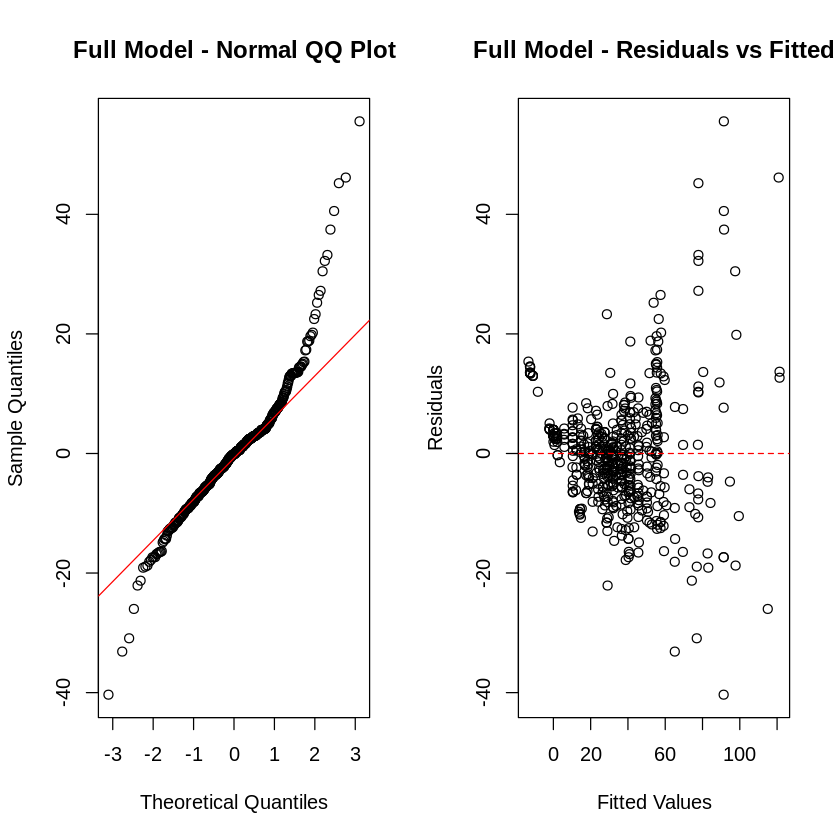

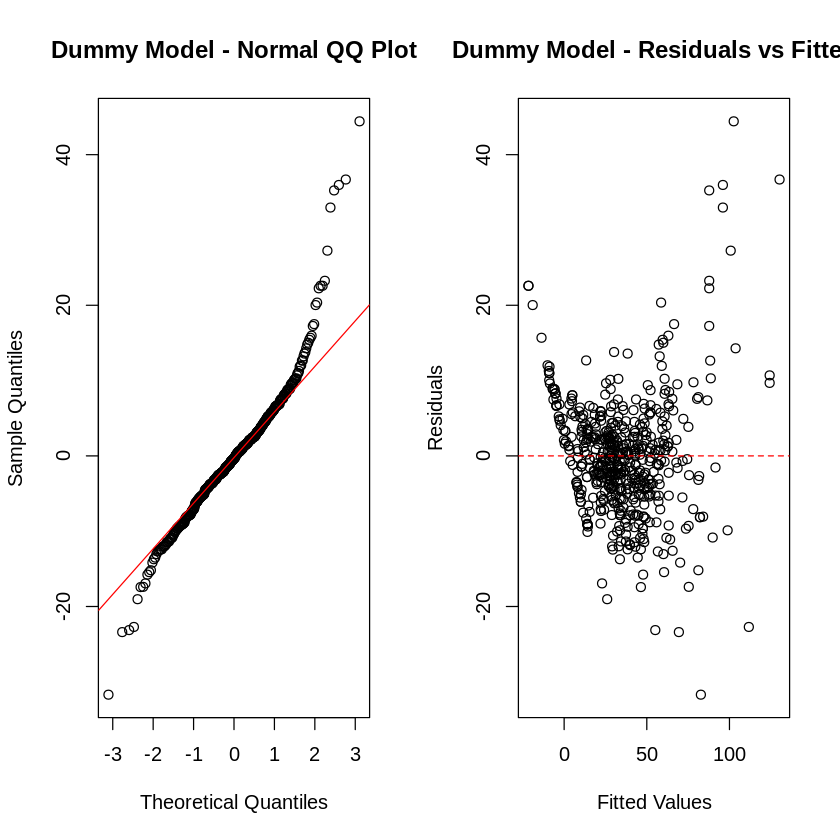

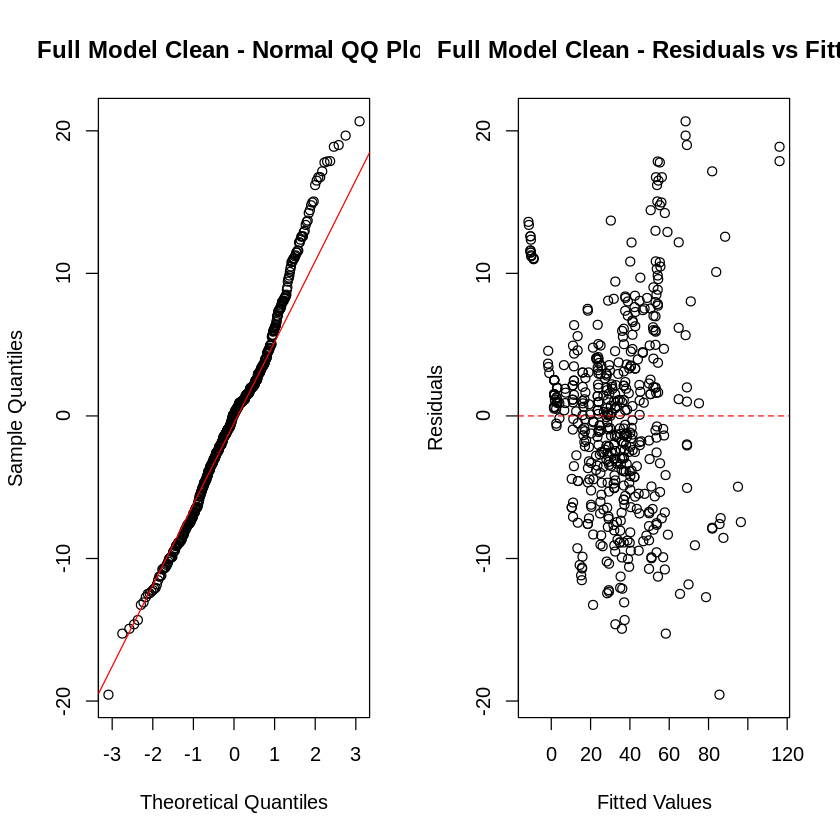

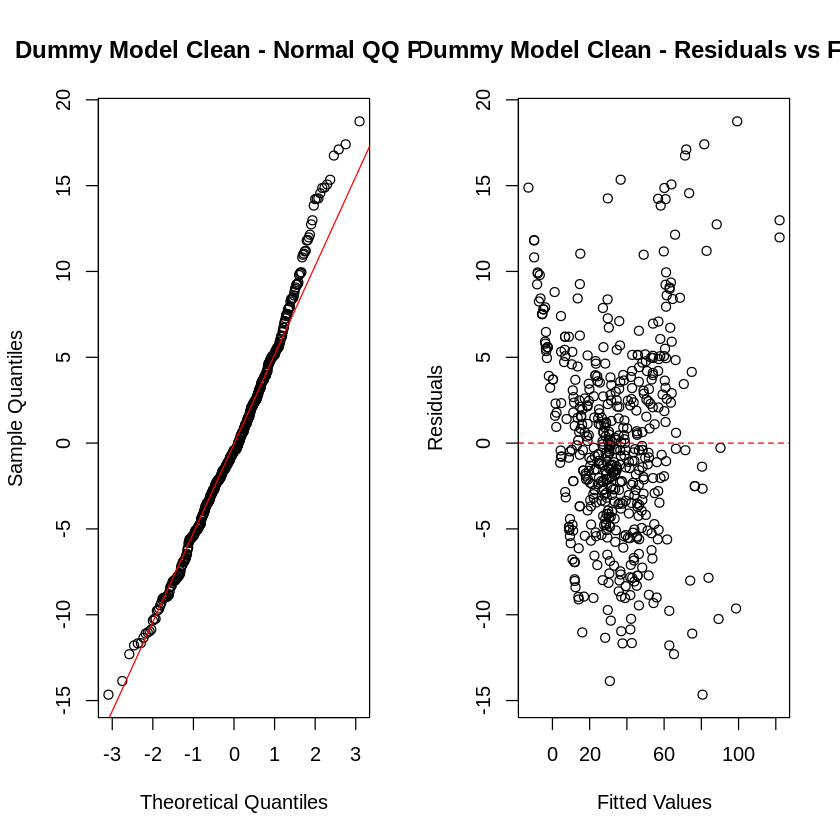

In [20]:
#Diagnostic plots for Full_model
par(mfrow = c(1,2))

#QQ plot for normality of residuals
qqnorm(residuals(Full_Model), main = "Full Model - Normal QQ Plot")
qqline(residuals(Full_Model), col = "red")

#Residuals vs Fitted plot for homoscedasticity
plot(fitted(Full_Model), residuals(Full_Model),
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Full Model - Residuals vs Fitted")
abline(h = 0, col = "red", lty = 2)

#Diagnostic plots for Dummy_Model
par(mfrow = c(1,2))

#QQ plot for normality of residuals
qqnorm(residuals(Dummy_Model), main = "Dummy Model - Normal QQ Plot")
qqline(residuals(Dummy_Model), col = "red")

#Residuals vs Fitted plot for homoscedasticity
plot(fitted(Dummy_Model), residuals(Dummy_Model),
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Dummy Model - Residuals vs Fitted")
abline(h = 0, col = "red", lty = 2)

#Diagnostic plots for Full_Model_Clean
par(mfrow = c(1,2))

#QQ plot for normality of residuals
qqnorm(residuals(Full_Model_Clean), main = "Full Model Clean - Normal QQ Plot")
qqline(residuals(Full_Model_Clean), col = "red")

#Residuals vs Fitted plot for homoscedasticity
plot(fitted(Full_Model_Clean), residuals(Full_Model_Clean),
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Full Model Clean - Residuals vs Fitted")
abline(h = 0, col = "red", lty = 2)

#Diagnostic plots for Dummy_Model_Clean
par(mfrow = c(1,2))

#QQ plot for normality of residuals
qqnorm(residuals(Dummy_Model_Clean), main = "Dummy Model Clean - Normal QQ Plot")
qqline(residuals(Dummy_Model_Clean), col = "red")

#Residuals vs Fitted plot for homoscedasticity
plot(fitted(Dummy_Model_Clean), residuals(Dummy_Model_Clean),
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Dummy Model Clean - Residuals vs Fitted")
abline(h = 0, col = "red", lty = 2)

#Reset plotting area
par(mfrow = c(1,1))

In [21]:


#Summary table for Full_model
full_summary_table <- ncaa_data %>%
  dplyr::select(Name, Team, Position, Skill.Points, Predicted_Full, Residual_Full) %>%
  dplyr::rename(
    Predicted = Predicted_Full,
    Residual = Residual_Full
  ) %>%
  dplyr::mutate(
    Predicted = round(Predicted, 2),
    Residual = round(Residual, 2)
  )

print(full_summary_table)

                Name       Team Position Skill.Points Predicted Residual
1        J Stromberg     Auburn       RB           89     99.47   -10.47
2          S Anthrop     Auburn       RB           89    115.00   -26.00
3            J Tatum     Auburn       CB          134    121.33    12.67
4           D Starks     Auburn       CB          135    121.32    13.68
5         M Holliday     Auburn       CB          167    120.85    46.15
6             D Snow     Auburn       QB           45     57.48   -12.48
7         L Chisena      Auburn       TE           64     83.10   -19.10
8           E Laguda     Auburn       WR           74     77.79    -3.79
9            R Pryor     Auburn       WR           88     77.79    10.21
10           L Caver     Auburn       OL           84     57.48    26.52
11            A Lake     Auburn       OL           89     77.79    11.21
12          R Hagans     Auburn       OL          105     77.79    27.21
13         K Rasheed     Auburn       OL          1

In [22]:
# Accuracy ranges for Full_model
cat("=== FULL MODEL ACCURACY ===\n")
ranges <- c(50, 25, 20, 10, 7.5, 5)

for (r in ranges) {
  within_range <- sum(abs(ncaa_data$Skill.Points - ncaa_data$Predicted_Full) <= r)
  percent_within <- within_range / nrow(ncaa_data) * 100
  cat("Number of predictions within", r, "points:", within_range, "\n")
  cat("Percentage of predictions within", r, "points:", round(percent_within, 2), "%\n\n")
}

=== FULL MODEL ACCURACY ===
Number of predictions within 50 points: 527 
Percentage of predictions within 50 points: 99.81 %

Number of predictions within 25 points: 513 
Percentage of predictions within 25 points: 97.16 %

Number of predictions within 20 points: 508 
Percentage of predictions within 20 points: 96.21 %

Number of predictions within 10 points: 415 
Percentage of predictions within 10 points: 78.6 %

Number of predictions within 7.5 points: 360 
Percentage of predictions within 7.5 points: 68.18 %

Number of predictions within 5 points: 279 
Percentage of predictions within 5 points: 52.84 %



In [23]:
#Summary table for Full_Model_Clean
full_clean_summary_table <- ncaa_data_no_outliers %>%
  dplyr::select(Name, Team, Position, Skill.Points, Predicted_Full, Residual_Full) %>%
  dplyr::rename(
    Predicted = Predicted_Full,
    Residual = Residual_Full
  ) %>%
  dplyr::mutate(
    Predicted = round(Predicted, 2),
    Residual = round(Residual, 2)
  )

print(full_clean_summary_table)

                Name       Team Position Skill.Points Predicted Residual
1        J Stromberg     Auburn       RB           89     96.45    -7.45
2            J Tatum     Auburn       CB          134    116.13    17.87
3           D Starks     Auburn       CB          135    116.12    18.88
4             D Snow     Auburn       QB           45     51.53    -6.53
5         L Chisena      Auburn       TE           64     73.07    -9.07
6           E Laguda     Auburn       WR           74     68.33     5.67
7            R Pryor     Auburn       WR           88     68.33    19.67
8             A Lake     Auburn       OL           89     68.33    20.67
9        R Chambers      Auburn       CB           76     75.12     0.88
10        D Mohamed      Auburn        S           71     69.00     2.00
11       N Hartline      Auburn       DL           67     69.00    -2.00
12           K Talib     Auburn       DL           70     69.00     1.00
13          J Gaskin     Auburn        S           

In [24]:
# Accuracy ranges for Full_Model_Clean
cat("=== FULL MODEL CLEAN ACCURACY ===\n")
ranges <- c(50, 25, 20, 10, 7.5, 5)

for (r in ranges) {
  within_range <- sum(abs(ncaa_data_no_outliers$Skill.Points - ncaa_data_no_outliers$Predicted_Full) <= r)
  percent_within <- within_range / nrow(ncaa_data_no_outliers) * 100
  cat("Number of predictions within", r, "points:", within_range, "\n")
  cat("Percentage of predictions within", r, "points:", round(percent_within, 2), "%\n\n")
}

=== FULL MODEL CLEAN ACCURACY ===
Number of predictions within 50 points: 503 
Percentage of predictions within 50 points: 100 %

Number of predictions within 25 points: 503 
Percentage of predictions within 25 points: 100 %

Number of predictions within 20 points: 502 
Percentage of predictions within 20 points: 99.8 %

Number of predictions within 10 points: 432 
Percentage of predictions within 10 points: 85.88 %

Number of predictions within 7.5 points: 368 
Percentage of predictions within 7.5 points: 73.16 %

Number of predictions within 5 points: 300 
Percentage of predictions within 5 points: 59.64 %



In [25]:

#Summary table for Dummy_Model
dummy_summary_table <- ncaa_dummy %>%
  dplyr::select(Name, Team, Position, Skill.Points, Predicted_Dummy, Residual_Dummy) %>%
  dplyr::rename(
    Predicted = Predicted_Dummy,
    Residual = Residual_Dummy
  ) %>%
  dplyr::mutate(
    Predicted = round(Predicted, 2),
    Residual = round(Residual, 2)
  )

print(dummy_summary_table)

                Name       Team Position Skill.Points Predicted Residual
1        J Stromberg     Auburn       RB           89     98.88    -9.88
2          S Anthrop     Auburn       RB           89    111.72   -22.72
3            J Tatum     Auburn       CB          134    124.31     9.69
4           D Starks     Auburn       CB          135    124.31    10.69
5         M Holliday     Auburn       CB          167    130.30    36.70
6             D Snow     Auburn       QB           45     60.44   -15.44
7         L Chisena      Auburn       TE           64     73.67    -9.67
8           E Laguda     Auburn       WR           74     74.43    -0.43
9            R Pryor     Auburn       WR           88     80.43     7.57
10           L Caver     Auburn       OL           84     66.50    17.50
11            A Lake     Auburn       OL           89     81.20     7.80
12          R Hagans     Auburn       OL          105     87.75    17.25
13         K Rasheed     Auburn       OL          1

In [26]:
# Accuracy ranges for Dummy_Model
cat("\n=== DUMMY MODEL ACCURACY ===\n")
for (r in ranges) {
  within_range <- sum(abs(ncaa_dummy$Skill.Points - ncaa_dummy$Predicted_Dummy) <= r)
  percent_within <- within_range / nrow(ncaa_dummy) * 100
  cat("Number of predictions within", r, "points:", within_range, "\n")
  cat("Percentage of predictions within", r, "points:", round(percent_within, 2), "%\n\n")
}


=== DUMMY MODEL ACCURACY ===
Number of predictions within 50 points: 528 
Percentage of predictions within 50 points: 100 %

Number of predictions within 25 points: 521 
Percentage of predictions within 25 points: 98.67 %

Number of predictions within 20 points: 512 
Percentage of predictions within 20 points: 96.97 %

Number of predictions within 10 points: 452 
Percentage of predictions within 10 points: 85.61 %

Number of predictions within 7.5 points: 388 
Percentage of predictions within 7.5 points: 73.48 %

Number of predictions within 5 points: 298 
Percentage of predictions within 5 points: 56.44 %



In [27]:
#Summary table for Dummy_Model_Clean
dummy_clean_summary_table <- ncaa_dummy_no_outliers %>%
  dplyr::select(Name, Team, Position, Skill.Points, Predicted_Dummy, Residual_Dummy) %>%
  dplyr::rename(
    Predicted = Predicted_Dummy,
    Residual = Residual_Dummy
  ) %>%
  dplyr::mutate(
    Predicted = round(Predicted, 2),
    Residual = round(Residual, 2)
  )

print(dummy_clean_summary_table)

                Name       Team Position Skill.Points Predicted Residual
1        J Stromberg     Auburn       RB           89     98.64    -9.64
2            J Tatum     Auburn       CB          134    122.02    11.98
3           D Starks     Auburn       CB          135    122.02    12.98
4             D Snow     Auburn       QB           45     54.32    -9.32
5         L Chisena      Auburn       TE           64     75.10   -11.10
6           E Laguda     Auburn       WR           74     70.56     3.44
7            R Pryor     Auburn       WR           88     73.44    14.56
8             A Lake     Auburn       OL           89     71.89    17.11
9        R Chambers      Auburn       CB           76     83.85    -7.85
10        D Mohamed      Auburn        S           71     66.16     4.84
11       N Hartline      Auburn       DL           67     64.09     2.91
12           K Talib     Auburn       DL           70     64.09     5.91
13          J Gaskin     Auburn        S           

In [28]:
# Accuracy ranges for Dummy_Model_Clean
cat("=== DUMMY MODEL CLEAN ACCURACY ===\n")
ranges <- c(50, 25, 20, 10, 7.5, 5)

for (r in ranges) {
  within_range <- sum(abs(ncaa_dummy_no_outliers$Skill.Points - ncaa_dummy_no_outliers$Predicted_Dummy) <= r)
  percent_within <- within_range / nrow(ncaa_dummy_no_outliers) * 100
  cat("Number of predictions within", r, "points:", within_range, "\n")
  cat("Percentage of predictions within", r, "points:", round(percent_within, 2), "%\n\n")
}

=== DUMMY MODEL CLEAN ACCURACY ===
Number of predictions within 50 points: 506 
Percentage of predictions within 50 points: 100 %

Number of predictions within 25 points: 506 
Percentage of predictions within 25 points: 100 %

Number of predictions within 20 points: 506 
Percentage of predictions within 20 points: 100 %

Number of predictions within 10 points: 468 
Percentage of predictions within 10 points: 92.49 %

Number of predictions within 7.5 points: 409 
Percentage of predictions within 7.5 points: 80.83 %

Number of predictions within 5 points: 324 
Percentage of predictions within 5 points: 64.03 %



In [29]:
#Accuracy Range Comparison Table (All Models)

# Define the ranges to compare
ranges <- c(50, 25, 20, 10, 7.5, 5)

# Initialize vectors to store results
range_values <- c()
full_percent <- c()
dummy_percent <- c()
full_clean_percent <- c()
dummy_clean_percent <- c()

# Calculate for each range
for (r in ranges) {
  # Full Model
  within_full <- sum(abs(ncaa_data$Skill.Points - ncaa_data$Predicted_Full) <= r)
  pct_full <- within_full / nrow(ncaa_data) * 100

  # Dummy Model
  within_dummy <- sum(abs(ncaa_dummy$Skill.Points - ncaa_dummy$Predicted_Dummy) <= r)
  pct_dummy <- within_dummy / nrow(ncaa_dummy) * 100

  # Full Model Clean
  within_full_clean <- sum(abs(ncaa_data_no_outliers$Skill.Points - ncaa_data_no_outliers$Predicted_Full) <= r)
  pct_full_clean <- within_full_clean / nrow(ncaa_data_no_outliers) * 100

  # Dummy Model Clean
  within_dummy_clean <- sum(abs(ncaa_dummy_no_outliers$Skill.Points - ncaa_dummy_no_outliers$Predicted_Dummy) <= r)
  pct_dummy_clean <- within_dummy_clean / nrow(ncaa_dummy_no_outliers) * 100

  # Store results
  range_values <- c(range_values, r)
  full_percent <- c(full_percent, pct_full)
  dummy_percent <- c(dummy_percent, pct_dummy)
  full_clean_percent <- c(full_clean_percent, pct_full_clean)
  dummy_clean_percent <- c(dummy_clean_percent, pct_dummy_clean)
}

# Create comparison dataframe (percentage only)
range_comparison <- data.frame(
  Range = paste("±", range_values, " points", sep = ""),
  Full_Percent = paste(round(full_percent, 2), "%", sep = ""),
  Dummy_Percent = paste(round(dummy_percent, 2), "%", sep = ""),
  Full_Clean_Percent = paste(round(full_clean_percent, 2), "%", sep = ""),
  Dummy_Clean_Percent = paste(round(dummy_clean_percent, 2), "%", sep = "")
)

# Rename columns for clarity
colnames(range_comparison) <- c(
  "Accuracy Range",
  "Full Model (%)",
  "Dummy Model (%)",
  "Full Clean (%)",
  "Dummy Clean (%)"
)

# Display the table
print(range_comparison)

  Accuracy Range Full Model (%) Dummy Model (%) Full Clean (%) Dummy Clean (%)
1     ±50 points         99.81%            100%           100%            100%
2     ±25 points         97.16%          98.67%           100%            100%
3     ±20 points         96.21%          96.97%          99.8%            100%
4     ±10 points          78.6%          85.61%         85.88%          92.49%
5    ±7.5 points         68.18%          73.48%         73.16%          80.83%
6      ±5 points         52.84%          56.44%         59.64%          64.03%


In [30]:
# Regression Equation for Dummy_Model_Clean
cat("===== DUMMY MODEL CLEAN REGRESSION EQUATION =====\n\n")

# Get coefficients
coefs <- coef(Dummy_Model_Clean)

# Print the equation
cat("Skill.Points = ", round(coefs[1], 4), "\n", sep = "")

for (i in 2:length(coefs)) {
  var_name <- names(coefs)[i]
  coef_value <- round(coefs[i], 4)

  if (coef_value >= 0) {
    cat("               + ", coef_value, " * ", var_name, "\n", sep = "")
  } else {
    cat("               ", coef_value, " * ", var_name, "\n", sep = "")
  }
}

===== DUMMY MODEL CLEAN REGRESSION EQUATION =====

Skill.Points = 83.3927
               -38.1697 * DevTImpact
               -50.5414 * DevTNormal
               -23.5499 * DevTStar
               + 0.3819 * HC_Moti.1
               + 2.0128 * HC_Moti.2
               + 0.6283 * OC_Moti.1
               + 3.1432 * DC_Moti.1
               + 9.5745 * HC_TD1
               + 2.715 * HC_TD2
               -0.3261 * HC_TD3
               + 3.0679 * OC_TD1
               + 1.8618 * OC_TD2
               + 2.4501 * OC_TD3
               -1.4864 * DC_TD1
               + 14.2505 * DC_TD2
               + 13.0683 * DC_TD3
               -0.4275 * XP.Penalty
               + 0.5672 * Position_CB
               -6.4484 * Position_DL
               + 0.26 * Position_K
               -10.6558 * Position_LB
               + 3.1753 * Position_OL
               + 0.8921 * Position_P
               -4.6697 * Position_RB
               -2.1717 * Position_S
               -6.6863 * Position_TE
        

In [31]:
#Full Summary
summary(Dummy_Model_Clean)


Call:
lm(formula = Skill.Points ~ DevT + HC_Moti.1 + HC_Moti.2 + OC_Moti.1 + 
    DC_Moti.1 + HC_TD1 + HC_TD2 + HC_TD3 + OC_TD1 + OC_TD2 + 
    OC_TD3 + DC_TD1 + DC_TD2 + DC_TD3 + XP.Penalty + Position_CB + 
    Position_DL + Position_K + Position_LB + Position_OL + Position_P + 
    Position_RB + Position_S + Position_TE + Position_WR + `Year_FR (RS)` + 
    Year_JR + `Year_JR (RS)` + Year_SO + `Year_SO (RS)`, data = ncaa_dummy_no_outliers)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6563  -3.5440  -0.4301   3.4557  18.7460 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     83.39266    2.55885  32.590  < 2e-16 ***
DevTImpact     -38.16970    1.98984 -19.182  < 2e-16 ***
DevTNormal     -50.54143    2.05366 -24.610  < 2e-16 ***
DevTStar       -23.54992    1.98655 -11.855  < 2e-16 ***
HC_Moti.1        0.38190    0.65714   0.581 0.561418    
HC_Moti.2        2.01283    0.76678   2.625 0.008945 ** 
OC_Moti.1        0.62829    1.12794

In [32]:
# ===== REFINED DUMMY MODEL (SIGNIFICANT VARIABLES ONLY) =====

# Build model with only significant predictors (p < 0.05)
Dummy_Model_Refined <- lm(Skill.Points ~ DevT +
                 HC_Moti.2 + DC_Moti.1 +
                 HC_TD1 + HC_TD2 +
                 OC_TD1 +
                 DC_TD2 + DC_TD3 +
                 XP.Penalty +
                 Position_CB + Position_DL + Position_K +
                 Position_LB + Position_OL + Position_P + Position_RB +
                 Position_S + Position_TE + Position_WR +
                 `Year_FR (RS)` + Year_JR + `Year_JR (RS)` + Year_SO +
                 `Year_SO (RS)`,
                 data = ncaa_dummy_no_outliers)

# Summary of refined model
cat("===== REFINED DUMMY MODEL SUMMARY =====\n\n")
summary(Dummy_Model_Refined)

# Get predictions and residuals
ncaa_dummy_no_outliers$Predicted_Refined <- predict(Dummy_Model_Refined)
ncaa_dummy_no_outliers$Residual_Refined <- ncaa_dummy_no_outliers$Skill.Points - ncaa_dummy_no_outliers$Predicted_Refined

# Calculate metrics
Refined_MAE <- mean(abs(ncaa_dummy_no_outliers$Residual_Refined))
Refined_RMSE <- sqrt(mean(ncaa_dummy_no_outliers$Residual_Refined^2))
Refined_R2 <- summary(Dummy_Model_Refined)$r.squared
Refined_AIC <- AIC(Dummy_Model_Refined)

# Compare to Dummy_Model_Clean
cat("\n\n===== MODEL COMPARISON: CLEAN vs REFINED =====\n\n")
comparison <- data.frame(
  Model = c("Dummy_Model_Clean", "Dummy_Model_Refined"),
  Variables = c(length(coef(Dummy_Model_Clean)), length(coef(Dummy_Model_Refined))),
  R_Squared = c(summary(Dummy_Model_Clean)$r.squared, Refined_R2),
  MAE = c(mean(abs(ncaa_dummy_no_outliers$Residual_Dummy)), Refined_MAE),
  RMSE = c(sqrt(mean(ncaa_dummy_no_outliers$Residual_Dummy^2)), Refined_RMSE),
  AIC = c(AIC(Dummy_Model_Clean), Refined_AIC)
)

print(comparison)

===== REFINED DUMMY MODEL SUMMARY =====




Call:
lm(formula = Skill.Points ~ DevT + HC_Moti.2 + DC_Moti.1 + HC_TD1 + 
    HC_TD2 + OC_TD1 + DC_TD2 + DC_TD3 + XP.Penalty + Position_CB + 
    Position_DL + Position_K + Position_LB + Position_OL + Position_P + 
    Position_RB + Position_S + Position_TE + Position_WR + `Year_FR (RS)` + 
    Year_JR + `Year_JR (RS)` + Year_SO + `Year_SO (RS)`, data = ncaa_dummy_no_outliers)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8571  -3.5427  -0.5114   3.4144  19.3779 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     85.75192    2.36968  36.187  < 2e-16 ***
DevTImpact     -38.65050    1.97500 -19.570  < 2e-16 ***
DevTNormal     -50.85084    2.03986 -24.929  < 2e-16 ***
DevTStar       -23.78959    1.97842 -12.025  < 2e-16 ***
HC_Moti.2        2.09328    0.73977   2.830 0.004856 ** 
DC_Moti.1        3.21197    0.84143   3.817 0.000153 ***
HC_TD1           8.73109    1.00356   8.700  < 2e-16 ***
HC_TD2           3.25448    1.01377   3.210



===== MODEL COMPARISON: CLEAN vs REFINED =====

                Model Variables R_Squared      MAE     RMSE      AIC
1   Dummy_Model_Clean        33 0.9321348 4.390158 5.649273 3256.271
2 Dummy_Model_Refined        27 0.9311582 4.410283 5.689777 3251.501


In [33]:
# Export cleaned data with predictions from Dummy_Model_Clean
tableau_data <- ncaa_dummy_no_outliers %>%
  select(Name, Team, Position, Year, DevT, Skill.Points,
         Predicted_Dummy, Residual_Dummy, XP.Penalty)

write.csv(tableau_data, "ncaa_predictions_clean.csv", row.names = FALSE)

In [34]:
# This moves it to a downloadable location in Colab
system("cp ncaa_predictions_clean.csv /content/")

In [35]:
# ===== REMOVE AUBURN FROM CLEANED DATA =====

# Start with the dataset that already has outliers removed
ncaa_dummy_final <- ncaa_dummy_no_outliers %>%
  filter(Team != "Auburn")

cat("Cleaned data rows (with Auburn):", nrow(ncaa_dummy_no_outliers), "\n")
cat("Final data rows (Auburn removed):", nrow(ncaa_dummy_final), "\n")
cat("Auburn players removed:", nrow(ncaa_dummy_no_outliers) - nrow(ncaa_dummy_final), "\n\n")

# ===== REBUILD DUMMY MODEL =====

Dummy_Model_Final <- lm(Skill.Points ~ DevT + HC_Moti.1 + HC_Moti.2 + OC_Moti.1 + DC_Moti.1 +
                 HC_TD1 + HC_TD2 + HC_TD3 + OC_TD1 + OC_TD2 + OC_TD3 +
                 DC_TD1 + DC_TD2 + DC_TD3 + XP.Penalty +
                 Position_CB + Position_DL + Position_K +
                 Position_LB + Position_OL + Position_P + Position_RB +
                 Position_S + Position_TE + Position_WR +
                 `Year_FR (RS)` + Year_JR + `Year_JR (RS)` + Year_SO +
                 `Year_SO (RS)`,
                 data = ncaa_dummy_final)

# Get predictions and residuals
ncaa_dummy_final$Predicted_Dummy <- predict(Dummy_Model_Final)
ncaa_dummy_final$Residual_Dummy <- ncaa_dummy_final$Skill.Points - ncaa_dummy_final$Predicted_Dummy

# Calculate metrics
Final_MAE <- mean(abs(ncaa_dummy_final$Residual_Dummy))
Final_RMSE <- sqrt(mean(ncaa_dummy_final$Residual_Dummy^2))
Final_R2 <- summary(Dummy_Model_Final)$r.squared

cat("===== FINAL MODEL PERFORMANCE =====\n")
cat("N:", nrow(ncaa_dummy_final), "\n")
cat("R²:", Final_R2, "\n")
cat("MAE:", Final_MAE, "\n")
cat("RMSE:", Final_RMSE, "\n\n")

# ===== COMPARE TO DUMMY_MODEL_CLEAN =====

cat("===== MODEL COMPARISON: WITH vs WITHOUT AUBURN =====\n\n")

comparison <- data.frame(
  Model = c("Dummy_Model_Clean (with Auburn)", "Dummy_Model_Final (no Auburn)"),
  N = c(nrow(ncaa_dummy_no_outliers), nrow(ncaa_dummy_final)),
  R_Squared = c(summary(Dummy_Model_Clean)$r.squared, Final_R2),
  MAE = c(mean(abs(ncaa_dummy_no_outliers$Residual_Dummy)), Final_MAE),
  RMSE = c(sqrt(mean(ncaa_dummy_no_outliers$Residual_Dummy^2)), Final_RMSE)
)

print(comparison)

# ===== EXPORT NEW CSV =====

tableau_data_final <- ncaa_dummy_final %>%
  select(Name, Team, Position, Year, DevT, Skill.Points,
         Predicted_Dummy, Residual_Dummy, XP.Penalty)

write.csv(tableau_data_final, "ncaa_predictions_no_auburn.csv", row.names = FALSE)

cat("Exported: ncaa_predictions_no_auburn.csv\n")

Cleaned data rows (with Auburn): 506 
Final data rows (Auburn removed): 484 
Auburn players removed: 22 

===== FINAL MODEL PERFORMANCE =====
N: 484 
R²: 0.9297828 
MAE: 3.870049 
RMSE: 5.038145 

===== MODEL COMPARISON: WITH vs WITHOUT AUBURN =====

                            Model   N R_Squared      MAE     RMSE
1 Dummy_Model_Clean (with Auburn) 506 0.9321348 4.390158 5.649273
2   Dummy_Model_Final (no Auburn) 484 0.9297828 3.870049 5.038145
Exported: ncaa_predictions_no_auburn.csv


In [36]:
# Count by Development Trait in Final Model

cat("===== COUNT BY DEVELOPMENT TRAIT =====\n\n")

devt_counts <- ncaa_dummy_no_outliers %>%
  group_by(DevT) %>%
  summarise(
    Count = n(),
    Percentage = round(n() / nrow(ncaa_dummy_no_outliers) * 100, 2)
  ) %>%
  arrange(desc(Count))

print(devt_counts)

cat("\nTotal Players:", nrow(ncaa_dummy_no_outliers), "\n")

===== COUNT BY DEVELOPMENT TRAIT =====

# A tibble: 4 × 3
  DevT   Count Percentage
  <chr>  <int>      <dbl>
1 Impact   250      49.4 
2 Star     129      25.5 
3 Normal   116      22.9 
4 Elite     11       2.17

Total Players: 506 


In [37]:
# Get DevT-specific accuracy
for (devt in c("Elite", "Impact", "Normal", "Star")) {
  devt_data <- ncaa_dummy_no_outliers %>% filter(DevT == devt)

  cat("\n", devt, ":\n", sep="")
  cat("  N:", nrow(devt_data), "\n")
  cat("  MAE:", round(mean(abs(devt_data$Residual_Dummy)), 2), "\n")
  cat("  ±5:", round(sum(abs(devt_data$Residual_Dummy) <= 5) / nrow(devt_data) * 100, 1), "%\n")
  cat("  ±10:", round(sum(abs(devt_data$Residual_Dummy) <= 10) / nrow(devt_data) * 100, 1), "%\n")
  cat("  ±15:", round(sum(abs(devt_data$Residual_Dummy) <= 15) / nrow(devt_data) * 100, 1), "%\n")
}


Elite:
  N: 11 
  MAE: 8.89 
  ±5: 27.3 %
  ±10: 45.5 %
  ±15: 100 %

Impact:
  N: 250 
  MAE: 3.5 
  ±5: 75.2 %
  ±10: 97.6 %
  ±15: 99.2 %

Normal:
  N: 116 
  MAE: 4.88 
  ±5: 55.2 %
  ±10: 90.5 %
  ±15: 99.1 %

Star:
  N: 129 
  MAE: 5.29 
  ±5: 53.5 %
  ±10: 88.4 %
  ±15: 97.7 %
